In [1]:


%load_ext autoreload
%autoreload 2

from rdkit import Chem
from rdkit.Chem import Draw
import matplotlib.pyplot as plt
from rdkit.Chem import rdDepictor
rdDepictor.SetPreferCoordGen(True)
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.molSize = (350, 350)
IPythonConsole.drawOptions.addAtomIndices = True
from openchemie import OpenChemIE
from PIL import Image
import numpy as np
from rdkit.Chem import AllChem
import cv2
import re
import torch
from openchemie import utils



import json
import copy

/Mounts/rbg-storage1/users/urop/vincentf/miniconda3/envs/openchemie/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
model = OpenChemIE(device = torch.device('cuda'))

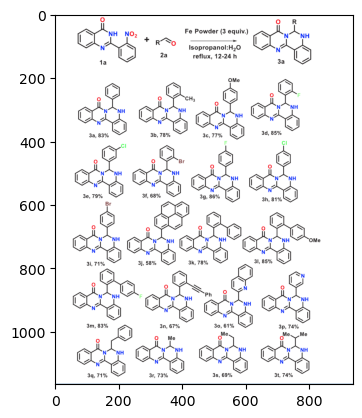

In [3]:
file_name = 'acs.joc.3c00766 example 1.png'

image_file = '../data/' + file_name

image = Image.open(image_file)

image_np = np.array(image)

plt.imshow(image_np)
plt.show()

In [4]:
results = model.extract_reactions_from_figures([image_np])

coref_results = model.extract_molecule_corefs_from_figures([image_np])

/Mounts/rbg-storage1/users/urop/vincentf/miniconda3/envs/openchemie/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Mounts/rbg-storage1/users/urop/vincentf/miniconda3/envs/openchemie/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/Mounts/rbg-storage1/users/urop/vincentf/miniconda3/envs/openchemie/lib/python3.9/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATe

Inspect the RxnScribe Outputs

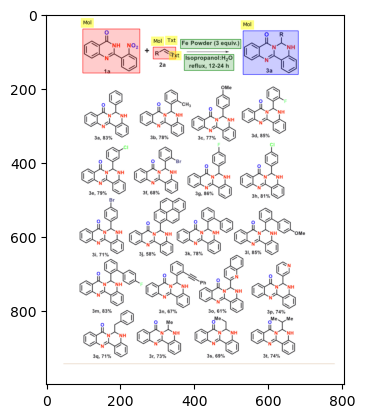

In [5]:
output = model.rxnscribe.draw_predictions(results[0]['reactions'], image_file = image_file)
plt.imshow(output[0])

{'O=c1c2ccccc2nc2n1C(c1ccc(Br)cc1)Nc1ccccc1-2': ['3i, 71%'], 'O=c1c2ccccc2nc2n1C(c1ccccc1-c1ccc(F)cc1)Nc1ccccc1-2': ['83%', '3m,'], 'O=c1c2ccccc2nc2n1C(c1cccc(Cl)c1)Nc1ccccc1-2': ['79%', '3e,'], 'O=c1[nH]c(-c2ccccc2[N+](=O)[O-])nc2ccccc12': ['Ia'], 'O=c1c2ccccc2nc2n1C(c1ccccc1)Nc1ccccc1-2': ['83%', '3a,'], 'O=c1c2ccccc2nc2n1C(Cc1ccccc1)Nc1ccccc1-2': ['71%', '3q,'], 'C=C/C=C\\C=C.O=c1c2ccccc2nc2n1C(c1ccc3ccc4cccc5ccc1c3c45)Nc1ccccc1-2': ['3j, 58%'], 'O=c1c2ccccc2nc2n1C(c1ccccc1Br)Nc1ccccc1-2': ['3f, 68%'], 'CC1Nc2ccccc2-c2nc3ccccc3c(=O)n21': ['73%', '30,'], 'CC.Cc1ccccc1C1Nc2ccccc2-c2nc3ccccc3c(=O)n21': ['3b, 78%'], 'C=C/C=C\\C.O=c1c2ccccc2nc2n1C(c1ccccc1C#Cc1ccccc1)Nc1ccccc1-2': ['67%', '3n,'], '*C=O': ['2a'], 'C=CC(=C)C=C.O=c1c2ccccc2nc2n1C(c1ccccc1-c1ccccc1)Nc1ccccc1-2': ['3k, 78%'], 'O=c1c2ccccc2nc2n1C(c1ccc(F)cc1)Nc1ccccc1-2': ['86%', '39,'], 'COc1ccc(C2Nc3ccccc3-c3nc4ccccc4c(=O)n32)cc1': ['77%', '3C,'], 'CCC1Nc2ccccc2-c2nc3ccccc3c(=O)n21': ['69%', '35,'], 'O=c1c2ccccc2nc2n1C(c1ccc

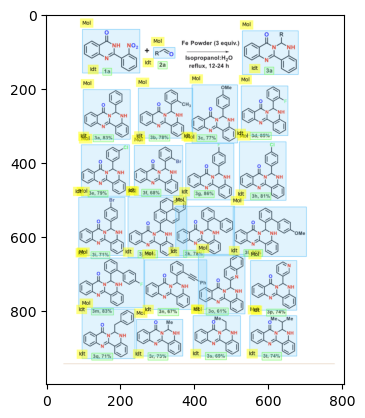

In [6]:
coref_output = model.moldet.draw_bboxes(coref_results[0], image_file = image_file, coref = True)

plt.imshow(coref_output[0])

coref_results_dict = {coref_results[0]['bboxes'][coref[0]]['smiles']: coref_results[0]['bboxes'][coref[1]]['text']  for coref in coref_results[0]['corefs']}

print(coref_results_dict)

O=c1[nH]c(-c2ccccc2[N+](=O)[O-])nc2ccccc12


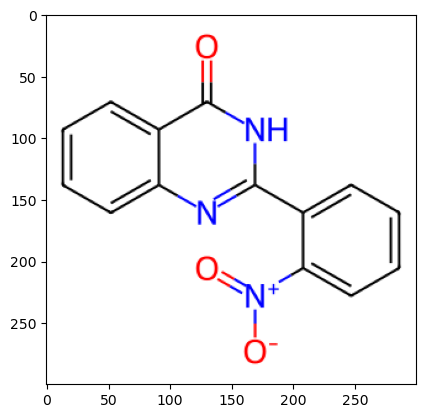

*C=O


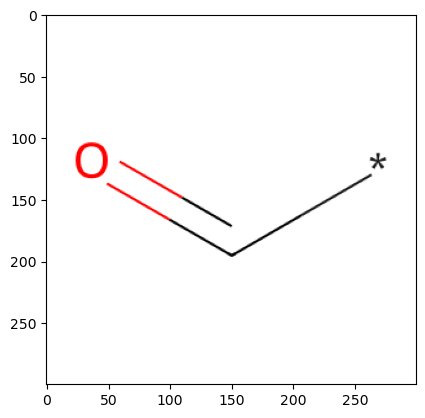

*C1Nc2ccccc2-c2nc3ccccc3c(=O)n21


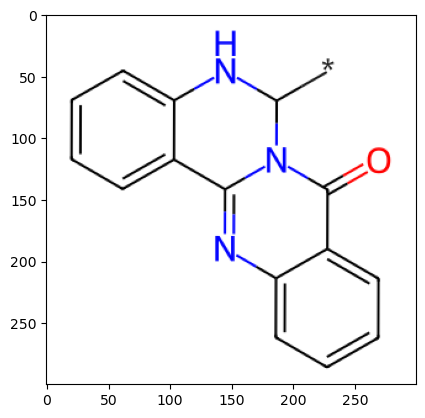

In [7]:
reactants_array = []
products = []

for reactant in results[0]['reactions'][0]['reactants']:
    print(reactant['smiles'])
    reactants_array.append(reactant['smiles'])
    i = Draw.MolToImage(Chem.MolFromSmiles(reactant['smiles']))
    plt.imshow(i)
    plt.show()
for product in results[0]['reactions'][0]['products']:
    print(product['smiles'])
    products.append(product['smiles'])
    i = Draw.MolToImage(Chem.MolFromSmiles(product['smiles']))
    plt.imshow(i)
    plt.show()

backout the reactants and do manual evaluation

In [9]:
backed_out = utils.backout(results, coref_results, model.molscribe)

In [10]:
backed_out

[(['O=c1[nH]c(-c2ccccc2[N+](=O)[O-])nc2ccccc12', 'O=Cc1ccc(Br)cc1'],
  '3i, 71%'),
 (['O=c1[nH]c(-c2ccccc2[N+](=O)[O-])nc2ccccc12', 'O=Cc1ccccc1-c1ccc(F)cc1'],
  '3m,'),
 (['O=c1[nH]c(-c2ccccc2[N+](=O)[O-])nc2ccccc12', 'O=Cc1cccc(Cl)c1'], '3e,'),
 (['O=c1[nH]c(-c2ccccc2[N+](=O)[O-])nc2ccccc12', 'O=Cc1ccccc1'], '3a,'),
 (['O=c1[nH]c(-c2ccccc2[N+](=O)[O-])nc2ccccc12', 'O=CCc1ccccc1'], '3q,'),
 (['O=c1[nH]c(-c2ccccc2[N+](=O)[O-])nc2ccccc12',
   'O=Cc1ccc2ccc3cccc4ccc1c2c34'],
  '3j, 58%'),
 (['O=c1[nH]c(-c2ccccc2[N+](=O)[O-])nc2ccccc12', 'O=Cc1ccccc1Br'], '3f, 68%'),
 (['O=c1[nH]c(-c2ccccc2[N+](=O)[O-])nc2ccccc12', 'Cc1ccccc1C=O'], '3b, 78%'),
 (['O=c1[nH]c(-c2ccccc2[N+](=O)[O-])nc2ccccc12', 'O=Cc1ccccc1C#Cc1ccccc1'],
  '3n,'),
 (['O=c1[nH]c(-c2ccccc2[N+](=O)[O-])nc2ccccc12', 'O=Cc1ccccc1-c1ccccc1'],
  '3k, 78%'),
 (['O=c1[nH]c(-c2ccccc2[N+](=O)[O-])nc2ccccc12', 'COc1ccc(C=O)cc1'], '3C,'),
 (['O=c1[nH]c(-c2ccccc2[N+](=O)[O-])nc2ccccc12', 'O=Cc1ccc(Cl)cc1'],
  '3h, 81%'),
 (['O=c1[nH]c(-c2

these are the predicted reactants corresponding the product with label 3i, 71%
O=c1[nH]c(-c2ccccc2[N+](=O)[O-])nc2ccccc12


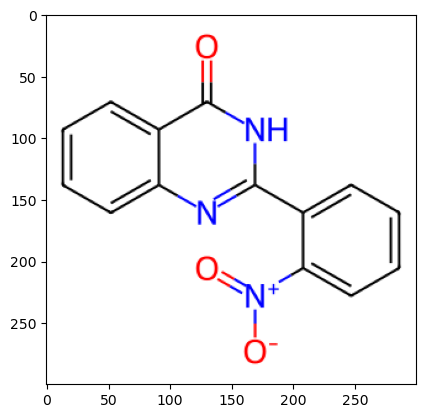

O=Cc1ccc(Br)cc1


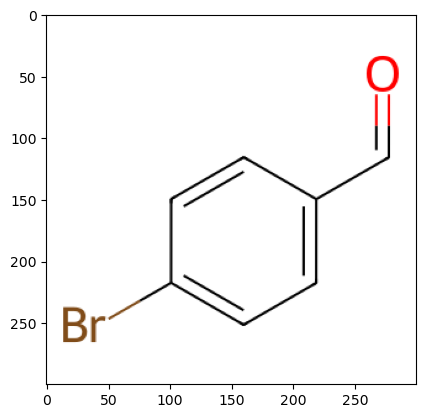

these are the predicted reactants corresponding the product with label 3m,
O=c1[nH]c(-c2ccccc2[N+](=O)[O-])nc2ccccc12


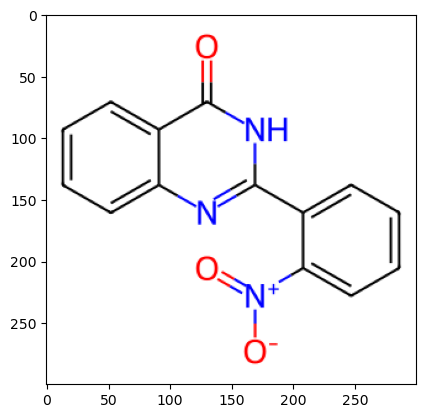

O=Cc1ccccc1-c1ccc(F)cc1


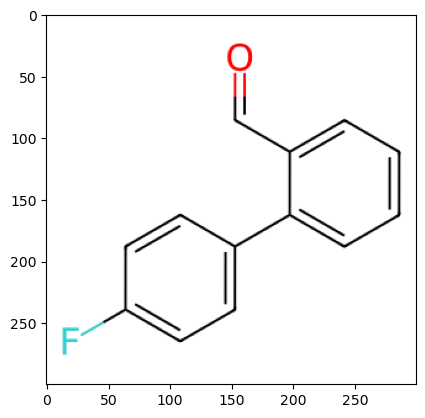

these are the predicted reactants corresponding the product with label 3e,
O=c1[nH]c(-c2ccccc2[N+](=O)[O-])nc2ccccc12


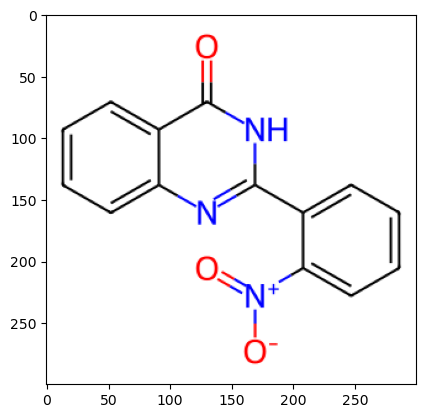

O=Cc1cccc(Cl)c1


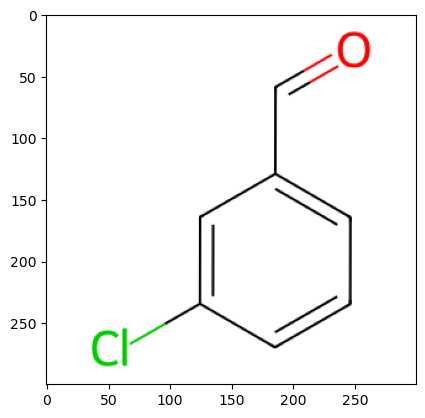

these are the predicted reactants corresponding the product with label 3a,
O=c1[nH]c(-c2ccccc2[N+](=O)[O-])nc2ccccc12


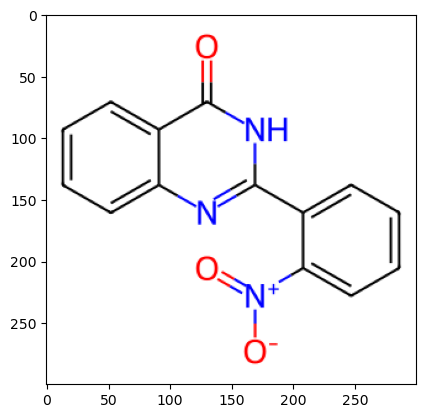

O=Cc1ccccc1


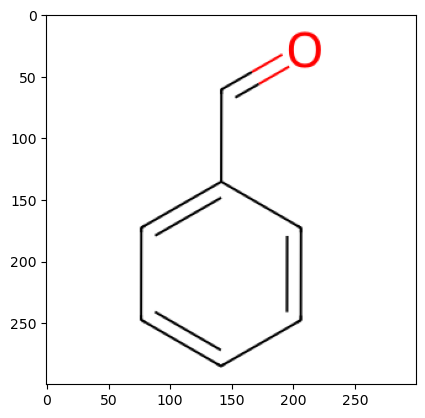

these are the predicted reactants corresponding the product with label 3q,
O=c1[nH]c(-c2ccccc2[N+](=O)[O-])nc2ccccc12


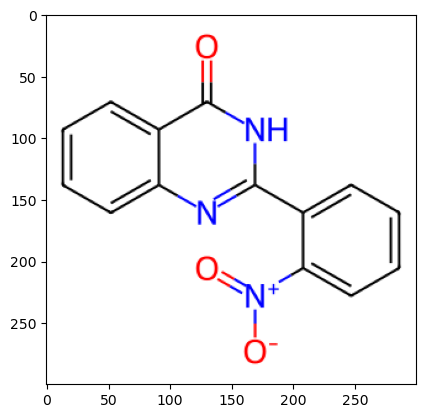

O=CCc1ccccc1


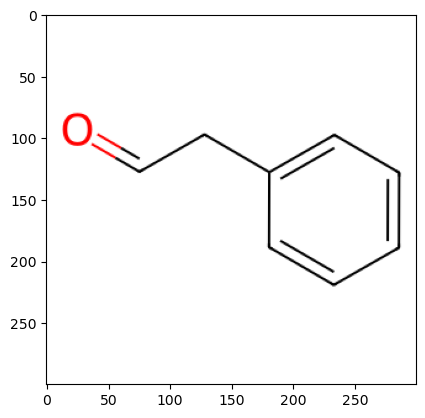

these are the predicted reactants corresponding the product with label 3j, 58%
O=c1[nH]c(-c2ccccc2[N+](=O)[O-])nc2ccccc12


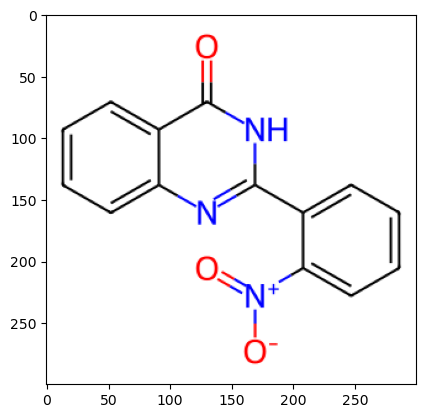

O=Cc1ccc2ccc3cccc4ccc1c2c34


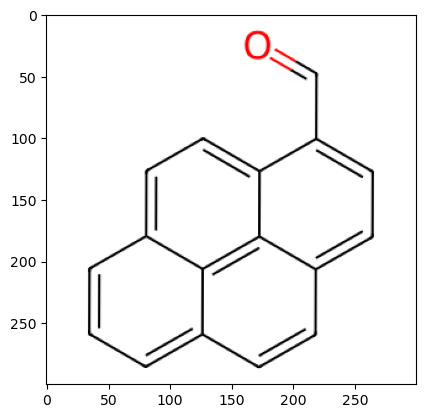

these are the predicted reactants corresponding the product with label 3f, 68%
O=c1[nH]c(-c2ccccc2[N+](=O)[O-])nc2ccccc12


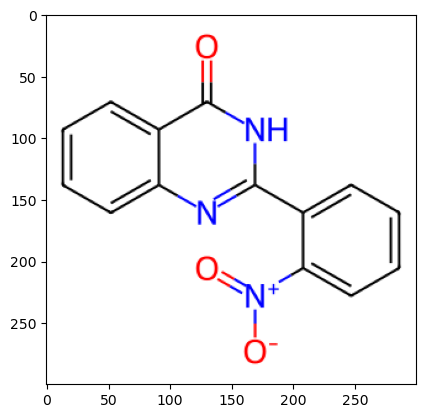

O=Cc1ccccc1Br


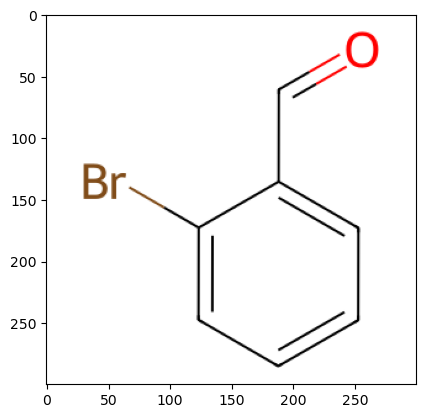

these are the predicted reactants corresponding the product with label 3b, 78%
O=c1[nH]c(-c2ccccc2[N+](=O)[O-])nc2ccccc12


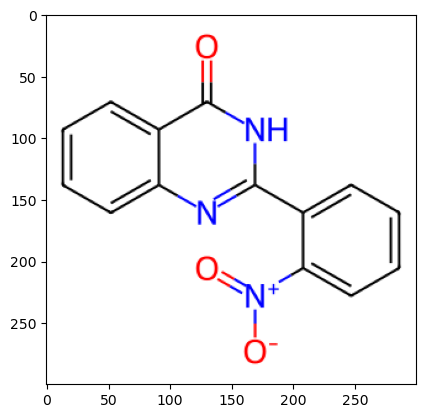

Cc1ccccc1C=O


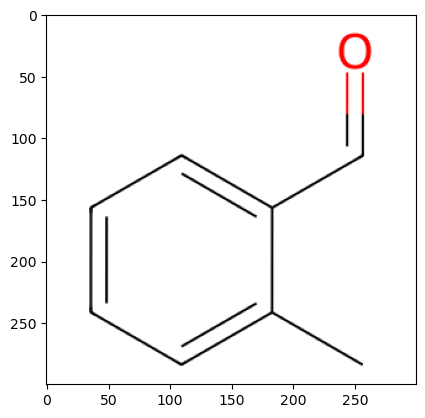

these are the predicted reactants corresponding the product with label 3n,
O=c1[nH]c(-c2ccccc2[N+](=O)[O-])nc2ccccc12


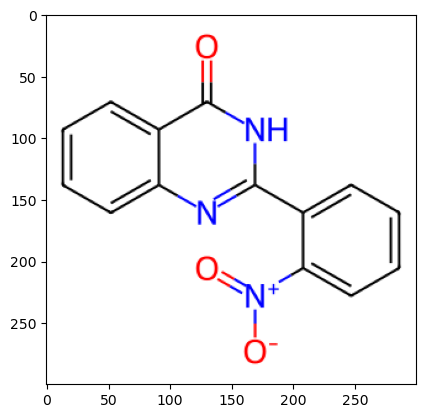

O=Cc1ccccc1C#Cc1ccccc1


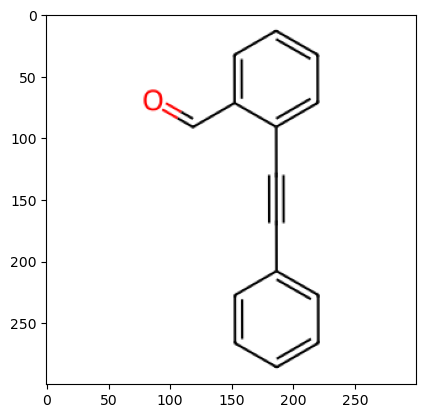

these are the predicted reactants corresponding the product with label 3k, 78%
O=c1[nH]c(-c2ccccc2[N+](=O)[O-])nc2ccccc12


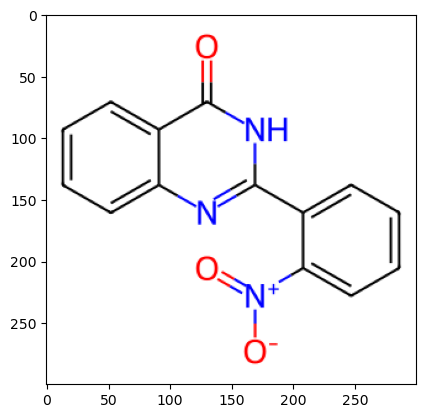

O=Cc1ccccc1-c1ccccc1


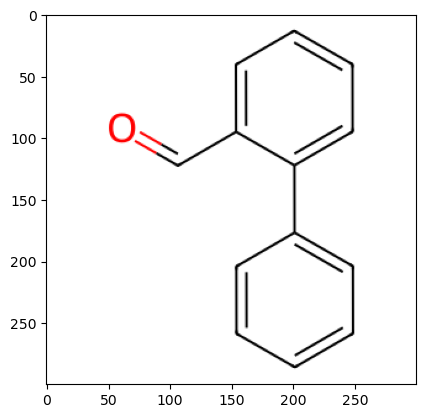

these are the predicted reactants corresponding the product with label 3C,
O=c1[nH]c(-c2ccccc2[N+](=O)[O-])nc2ccccc12


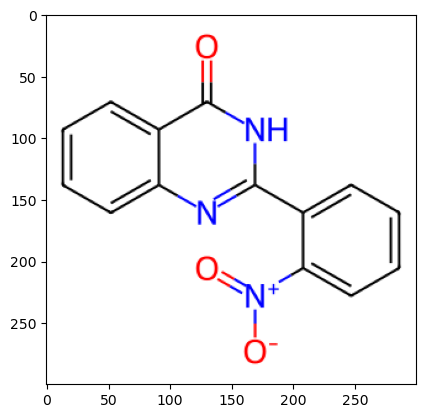

COc1ccc(C=O)cc1


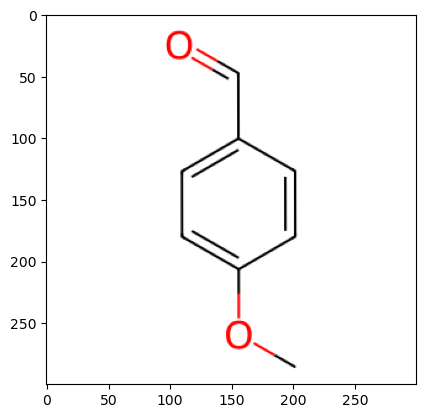

these are the predicted reactants corresponding the product with label 3h, 81%
O=c1[nH]c(-c2ccccc2[N+](=O)[O-])nc2ccccc12


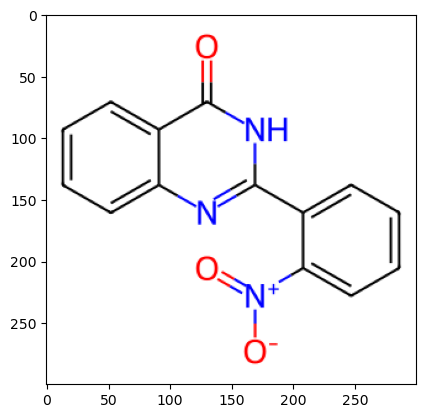

O=Cc1ccc(Cl)cc1


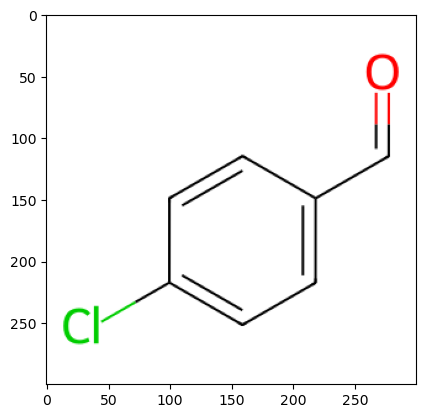

these are the predicted reactants corresponding the product with label 3d, 85%
O=c1[nH]c(-c2ccccc2[N+](=O)[O-])nc2ccccc12


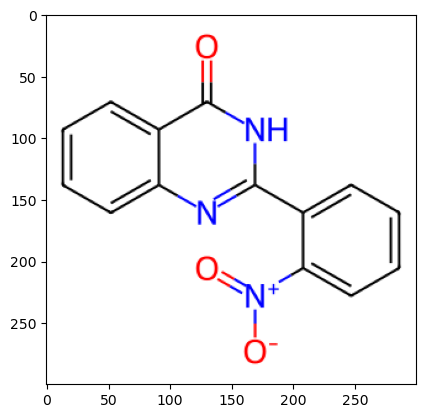

O=Cc1ccccc1F


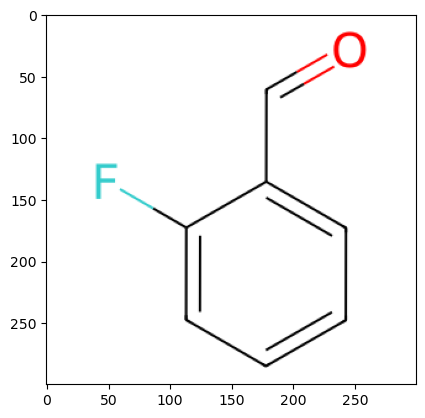

these are the predicted reactants corresponding the product with label 3t, 74%
O=c1[nH]c(-c2ccccc2[N+](=O)[O-])nc2ccccc12


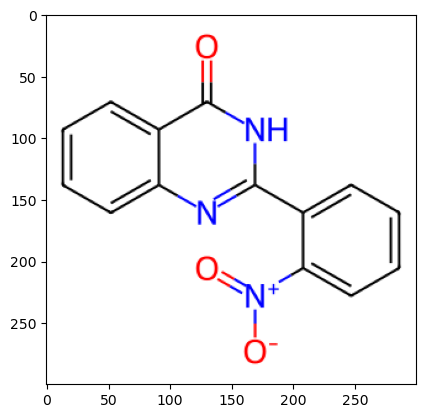

CC(C)C=O


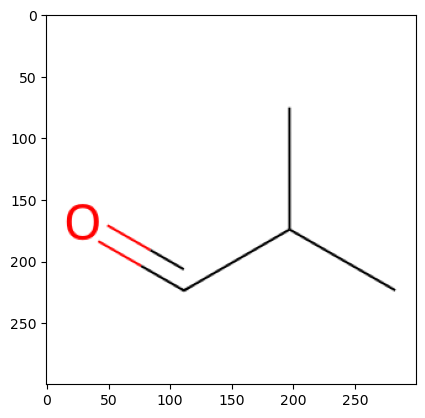

these are the predicted reactants corresponding the product with label 3P,
O=c1[nH]c(-c2ccccc2[N+](=O)[O-])nc2ccccc12


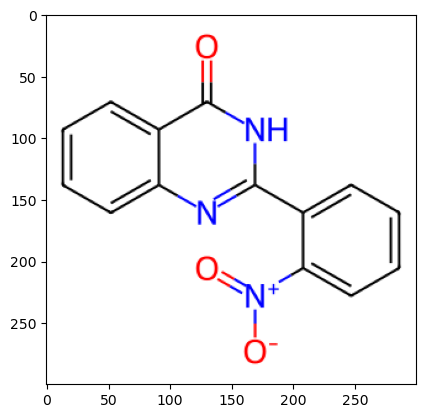

O=Cc1cccnc1


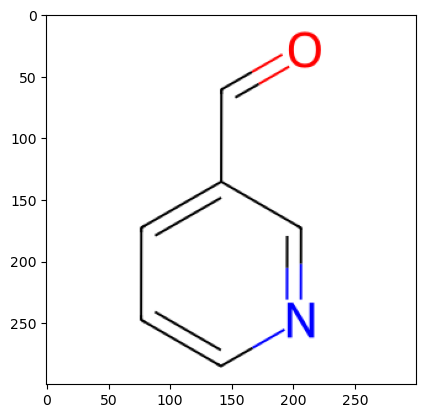

In [11]:
extracted_reactants = {}

for reactants, label in backed_out:
    print(f'these are the predicted reactants corresponding the product with label {label}')
    extracted_reactants[label] = []
    for molecule in reactants:
        print(molecule)
        extracted_reactants[label].append(molecule)
        i = Draw.MolToImage(Chem.MolFromSmiles(molecule))
        plt.imshow(i)
        plt.show()

backout results:

3a yes
3b yes
3c yes
3d yes
3e yes
3f yes
3g no
3h yes 
3i yes
3j no
3k no
3l no
3m no actual error
3n yes
3o no
3p yes
3q yes
3r no
3s no
3t yes

precision 12/20 recall 12/14